In [144]:
import pandas as pd
import numpy as np
import glob
import matplotlib.pyplot as plt
from scipy import stats
import scipy
import csv

In [145]:
#Define your path to directory with raw particle data
path = "particle_data293/" 

In [146]:
# for loop that combines all .xls files within path directory. Creates new variable "all_data" as .csv 
# and saves within path directory as "total_particles"
all_data = pd.DataFrame()
for f in glob.glob(path+'\*.xls'): #you may need to change \ -> / if on mac
    df = pd.read_csv(f,sep='\s+') #you may need to change \ -> / if on mac
    all_data = all_data.append(df,ignore_index=True) 
    
all_data.to_csv(path+'/total_particles.csv')

In [147]:
# Read new total_particle.csv and define variable "area" 
file= path+'/total_particles.csv'
df = pd.read_csv(file,header=0)
area=df['Area']
TP = len(area)
print(TP)

# transform surface area to equivalent spherical diameter (ESD)
ESD = (2*(area/np.pi)**.5) 

228


In [163]:
# define bins (how many, width, and center). Code in this cell modified from Colleen Durkin. 

bins = []
for x in np.arange(2,10,.5):  #This was 1.5,10,.5
    bin = 2**x
    bins.append(bin)

bin_mids = []
for y in np.arange(0,len(bins)-1):
    mid = bins[y] + (bins[y+1]-bins[y])/2
    bin_mids.append(mid)

bin_width = []
for z in np.arange(0,len(bins)-1):
    width = (bins[z+1]-bins[z])
    bin_width.append(width)

In [164]:
# Use numpy histgram to sort particle counts into size class bins. This sorted data is then normalized by bin width. 

histogram=np.histogram(ESD,bins=bins,range=None, normed=False, weights=None, density=None) 
n=((histogram[0]*30.376)/bin_width)*10 #normalized multiplied counts by (30.376) to represent particles/1mL


In [165]:
# get rid of bins with no data

bin_mids_array=np.asarray(bin_mids) # change bin_mids from tuple to array so can be indexed
ii=np.where(n>0) # index to remove zero data
bin_mids_nonzero=bin_mids_array[ii] # only bins with data
n_nozero=n[ii] # no zero values

In [166]:
# PSD function will be used in max.min to calculate differences in estimated power equation from real data

def PSD (var, bin_mid, normalized): #var is in format of [#,#], normilized = my n
    normalized_n = normalized#[normalized>0]
    bin_center = bin_mids_nonzero # figure this line out
    Y = (10**var[0])*bin_mids_nonzero**var[1]
    difference = np.sum((np.log(Y)- np.log(n_nozero))**2)
    return difference 

In [167]:
# optimize the power equation fit using PSD function. Output is variables A and B in equation y = A(x)^B

maxmin=scipy.optimize.minimize(PSD, [1, -3], args= (bin_mids, n)) # then use these to plot y= over hist with estimates of [1,-3]
intercept = np.round(maxmin['x'][0],2)
slope = np.round(maxmin['x'][1],2)
print(intercept, slope)

5.57 -2.41


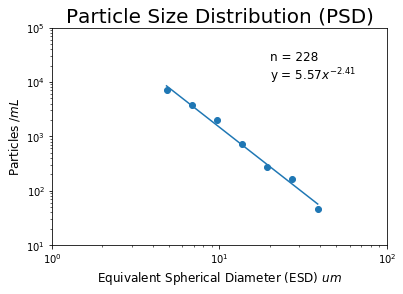

In [172]:
plt.figure()
plt.scatter(bin_mids_nonzero, n_nozero)
plt.plot(bin_mids_nonzero,(10**maxmin['x'][0])*bin_mids_nonzero**(maxmin['x'][1])) #this is where you add in variable x from optimize.min result 
plt.xlabel('Equivalent Spherical Diameter (ESD) $um$', fontsize=12 )
plt.ylabel('Particles /$mL$', fontsize=12)
plt.title('Particle Size Distribution (PSD)', fontsize=20)
plt.text(20,10000,'n = %s \ny = %s$x^{%s}$ '%(TP, intercept, slope), fontsize = 12)
plt.yscale('log')
plt.xscale('log')
plt.axis([1,100,10,100000])
plt.savefig(path+'plot')
plt.show()

In [173]:
# add slope and intercept for power eqution, and total particle counts to main data file 
df.head()
df['Intercept'] = maxmin['x'][0]
df['Slope'] = maxmin['x'][1]
df['Total']= TP

In [174]:
df.head()


,Unnamed: 0,Area,Mean,Min,Max,Intercept,Slope,Total
0,0,28.113,255,255,255,5.573035,-2.406454,228
1,1,1.041,255,255,255,5.573035,-2.406454,228
2,2,9.371,255,255,255,5.573035,-2.406454,228
3,3,4.165,255,255,255,5.573035,-2.406454,228
4,4,1521.241,255,255,255,5.573035,-2.406454,228


In [175]:
df.to_csv(path+'/total_particles.csv')


In [42]:
a = [('sample',path[-4:-1])]

In [43]:
print(a)

[('sample', '293')]


In [44]:
# not sure what I was doing here 

with open('slope_intercept', 'wb') as csvfile:  
    filewriter = csv.writer(csvfile, delimiter=',',
                            quotechar='|', quoting=csv.QUOTE_MINIMAL)
    filewriter.writerow(['sample', 'Profession'])

TypeError: a bytes-like object is required, not 'str'